In [1]:
#importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#importing dataset

nyc_df=pd.read_csv('311_Service_Requests_for_2009.csv')

C:\Users\vishw\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (8,13,14,17,18,20,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#EDA

nyc_df.shape

(1783133, 52)

In [7]:
nyc_df.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Action Updated Date', u'Community Board',
       u'Borough', u'X Coordinate (State Plane)',
       u'Y Coordinate (State Plane)', u'Park Facility Name', u'Park Borough',
       u'School Name', u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',
       u'Bridge Highway Segment',

In [8]:
nyc_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,12822544,01/01/2009 12:00:00 AM,01/07/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11225,55 WINTHROP STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656621,-73.958066,"(40.65662129596871, -73.95806621423951)"
1,12818524,01/01/2009 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Restaurant/Bar/Deli/Bakery,11102,29-35 NEWTOWN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.768896,-73.921818,"(40.76889608950418, -73.92181786912313)"
2,12823061,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11220,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.635345,-74.016822,"(40.635344653337626, -74.01682221017914)"
3,12823062,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.698378,-73.983050,"(40.698378448801606, -73.98305008771115)"
4,12823063,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11235,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.592752,-73.950152,"(40.59275234651692, -73.95015246435702)"


In [36]:
nyc_df["Descriptor"].unique()

array(['HEAT', 'Smoking Violation', 'Controller', 'VERMIN', 'WATER-LEAKS',
       'Loud Music/Party', 'No Access', 'CEILING', 'DOORS',
       'ELECTRIC-SUPPLY', 'MOLD', 'JANITOR-SUPER', 'RUBBISH', 'WINDOWS',
       'CERAMIC-TILE', 'RADIATOR', 'FLOOR', 'REFRIGERATOR', 'WALLS',
       'LIGHTING', 'Driver Complaint', 'BASIN/SINK', 'ELECTRIC/GAS-RANGE',
       'WATER-SUPPLY', 'Car/Truck Music', 'Street Light Out', 'GAS',
       'Partial Access', 'Lost Coin', 'Tree Leaning/Uprooted',
       'Dead/Dying Tree', 'Loud Talking', 'Vehicle Complaint',
       'Blocked - Construction', 'Inadequate or No Heat',
       'Structure - Outdoors', 'Car Service Company Complaint',
       'Line/Marking - Faded', 'Entire Tree Has Fallen Down', 'TOILET',
       'ROOF', 'Engine Idling', 'Credit Card Stuck in Meter', 'BATHTUB',
       'BELL-BUZZER/INTERCOM', 'Snow or Ice',
       'Playing in Unsuitable Place', 'HEAT-PLANT', 'CARBON MONOXIDE',
       'CABINETS', 'Other (Explain Below)', 'Underage - Licensed Est'

In [42]:
#Display Complaint and city together
nyc_complaintandcity=pd.DataFrame(nyc_df[['Complaint Type','City']])
nyc_complaintandcity


,Complaint Type,City
0,HEATING,BROOKLYN
1,Smoking,ASTORIA
2,Traffic Signal Condition,BROOKLYN
3,Traffic Signal Condition,BROOKLYN
4,Traffic Signal Condition,BROOKLYN
5,HEATING,OZONE PARK
6,NONCONST,BROOKLYN
7,HEATING,BROOKLYN
8,HEATING,WOODSIDE
9,HEATING,NEW YORK


In [43]:
nyc_complaintandcity.groupby(['Complaint Type','City']).size()

Complaint Type           City               
APPLIANCE                ARVERNE                  70
                         ASTORIA                  82
                         BAYSIDE                   4
                         BELLEROSE                 4
                         BRONX                  5042
                         BROOKLYN               5275
                         CAMBRIA HEIGHTS           7
                         COLLEGE POINT            19
                         CORONA                   51
                         EAST ELMHURST            49
                         ELMHURST                 84
                         FAR ROCKAWAY            191
                         FLUSHING                111
                         FOREST HILLS             50
                         FRESH MEADOWS             6
                         GLEN OAKS                 5
                         HOLLIS                   52
                         HOWARD BEACH             16
 

In [47]:
#displaying Type of complaint, it's Descriptor and city wise count of those complaints
nyc_df.groupby(["Complaint Type","Descriptor","City"]).size()

Complaint Type           Descriptor                     City               
APPLIANCE                AIR-CONDITIONER                BRONX                    15
                                                        BROOKLYN                 26
                                                        CORONA                    1
                                                        EAST ELMHURST             1
                                                        FLUSHING                  3
                                                        FOREST HILLS              1
                                                        FRESH MEADOWS             3
                                                        HOWARD BEACH              2
                                                        JAMAICA                   3
                                                        NEW YORK                 17
                                                        OAKLAND GARDENS           1


In [49]:
#total Complaint Count
totalcomplaintcount=pd.DataFrame(nyc_complaintandcity['Complaint Type'].value_counts())
totalcomplaintcount

,Complaint Type
HEATING,238995
Street Light Condition,130242
GENERAL CONSTRUCTION,121048
PLUMBING,104931
Street Condition,102150
PAINT - PLASTER,84324
NONCONST,67325
Water System,62991
General Construction/Plumbing,61288
Traffic Signal Condition,60995


In [50]:
#displaying top 10 complaints
totalcomplaintcount.head(10)

,Complaint Type
HEATING,238995
Street Light Condition,130242
GENERAL CONSTRUCTION,121048
PLUMBING,104931
Street Condition,102150
PAINT - PLASTER,84324
NONCONST,67325
Water System,62991
General Construction/Plumbing,61288
Traffic Signal Condition,60995


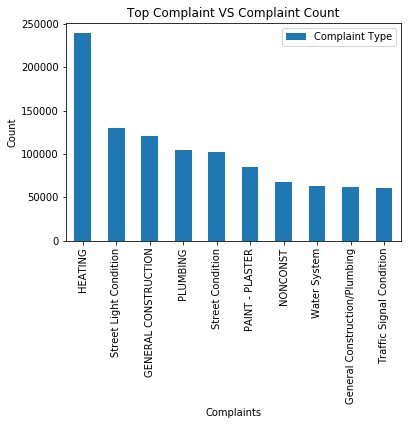

In [51]:
#bar graph showing top complaints vs their count
plt.figure(figsize=(10,8))
totalcomplaintcount.head(10).plot(kind='bar')
plt.title('Top Complaint VS Complaint Count')
plt.xlabel('Complaints')
plt.ylabel('Count')
plt.show()

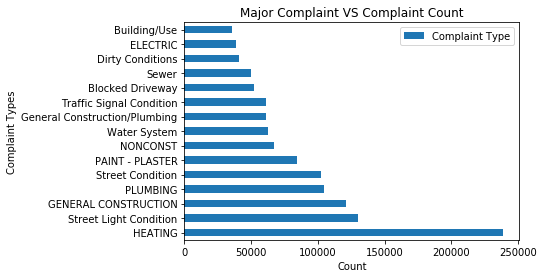

In [63]:
#horizontal bar graph showing major 15 complaint types and their count
totalcomplaintcount.head(15).plot(kind='barh')
plt.title('Major Complaint VS Complaint Count')
plt.xlabel('Count')
plt.ylabel('Complaint Types')
plt.show()

In [69]:
mc=nyc_df.groupby('Complaint Type')
sortedComplainttype=mc.size().sort_values(ascending=False)
sortedComplainttype=sortedComplainttype.to_frame('count').reset_index()
sortedComplainttype

,Complaint Type,count
0,HEATING,238995
1,Street Light Condition,130242
2,GENERAL CONSTRUCTION,121048
3,PLUMBING,104931
4,Street Condition,102150
5,PAINT - PLASTER,84324
6,NONCONST,67325
7,Water System,62991
8,General Construction/Plumbing,61288
9,Traffic Signal Condition,60995


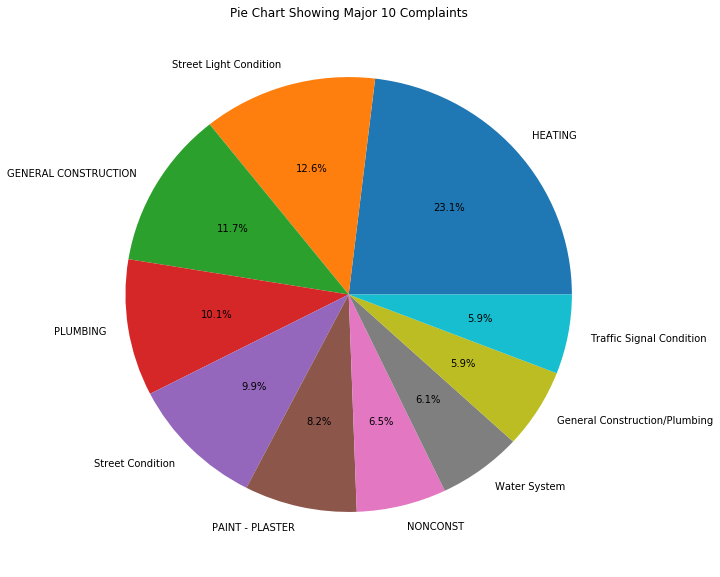

In [71]:
sortedComplainttype=sortedComplainttype.head(10)
plt.figure(figsize=(10,10))
plt.pie(sortedComplainttype['count'],labels=sortedComplainttype["Complaint Type"],autopct="%1.1f%%")
plt.title('Pie Chart Showing Major 10 Complaints')
plt.show()